In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='EupzR5IYcAPMlLpl5NJc5cS0zOhw5gb2ouxLvCU3uc0n',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'windenergyprediction-donotdelete-pr-djmkzqhcl6oznr'
object_key = 'T1.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)

In [3]:
#head funtion and tail funtion
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [4]:
data = data.rename(columns = {"Date/Time":"Date",
                            "LV ActivePower (kW)":"Active_Power",
                            "Wind Speed (m/s)":"Wind_Speed",
                            "Theoretical_Power_Curve (KWh)":"Theoretical_Power",
                            "Wind Direction (°)" :"Wind_Direction"
                           })

In [5]:
data.tail() #last 5 rows of the dataset

,Date,Active_Power,Wind_Speed,Theoretical_Power,Wind_Direction
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913
50529,31 12 2018 23:50,2820.466064,9.979332,2779.184096,82.274620


In [6]:
#shape of the dataset
data.shape

(50530, 5)

## Statistical Analysis

In [7]:
data.mean()

/tmp/wsuser/ipykernel_220/531903386.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


Active_Power         1307.684332
Wind_Speed              7.557952
Theoretical_Power    1492.175463
Wind_Direction        123.687559
dtype: float64

In [8]:
data.median()

/tmp/wsuser/ipykernel_220/4184645713.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.median()


Active_Power          825.838074
Wind_Speed              7.104594
Theoretical_Power    1063.776283
Wind_Direction         73.712978
dtype: float64

In [9]:
data.mode()

,Date,Active_Power,Wind_Speed,Theoretical_Power,Wind_Direction
0,01 01 2018 00:00,0.0,0.0,0.0,0.0
1,01 01 2018 00:10,NaN,NaN,NaN,NaN
2,01 01 2018 00:20,NaN,NaN,NaN,NaN
3,01 01 2018 00:30,NaN,NaN,NaN,NaN
4,01 01 2018 00:40,NaN,NaN,NaN,NaN
...,...,...,...,...,...
50525,31 12 2018 23:10,NaN,NaN,NaN,NaN
50526,31 12 2018 23:20,NaN,NaN,NaN,NaN
50527,31 12 2018 23:30,NaN,NaN,NaN,NaN
50528,31 12 2018 23:40,NaN,NaN,NaN,NaN


In [10]:
data.var()

/tmp/wsuser/ipykernel_220/445316826.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.var()


Active_Power         1.722549e+06
Wind_Speed           1.786893e+01
Theoretical_Power    1.871474e+06
Wind_Direction       8.731732e+03
dtype: float64

In [11]:
data.std()

/tmp/wsuser/ipykernel_220/2723740006.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.std()


Active_Power         1312.459242
Wind_Speed              4.227166
Theoretical_Power    1368.018238
Wind_Direction         93.443736
dtype: float64

In [12]:
data.describe()

,Active_Power,Wind_Speed,Theoretical_Power,Wind_Direction
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [13]:
data['Active_Power'].unique ()

array([ 380.04779053,  453.76919556,  306.37658691, ..., 2201.10693359,
       2515.6940918 , 2820.46606445])

In [14]:
data['Theoretical_Power'].unique()

array([ 416.32890782,  519.91751106,  390.90001581, ..., 1788.28475526,
       2418.38250336, 2779.18409628])

In [15]:
data['Active_Power'].value_counts ()

0.000000       10781
3602.670898        5
3602.268066        5
3603.145996        5
3602.216064        5
               ...  
3135.654053        1
3223.466064        1
2877.299072        1
2619.701904        1
2820.466064        1
Name: Active_Power, Length: 38764, dtype: int64

In [16]:
data['Theoretical_Power'].value_counts ()

0.000000       7749
3600.000000    5454
3406.349668       3
3125.949347       3
662.711645        3
               ... 
924.994100        1
1215.522996       1
945.678903        1
1379.337345       1
2779.184096       1
Name: Theoretical_Power, Length: 37157, dtype: int64

## DataVisualization
1.Uni Variate Analysis

2.Bi Variate Analysis

3.Multi Variate Analysis

### Uni Variate Analysis

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Active_Power', ylabel='Density'>

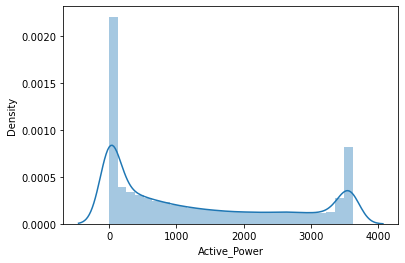

In [17]:
sns.distplot(data['Active_Power'])

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Wind_Speed', ylabel='Density'>

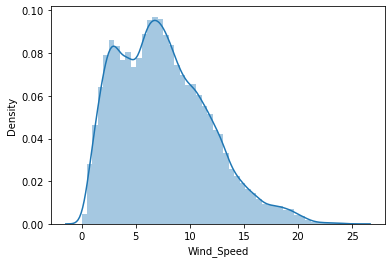

In [18]:
sns.distplot(data['Wind_Speed'])

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Theoretical_Power', ylabel='Density'>

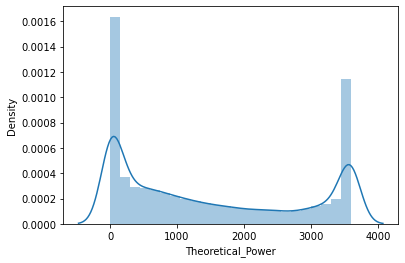

In [19]:
sns.distplot(data['Theoretical_Power'])

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Wind_Direction', ylabel='Density'>

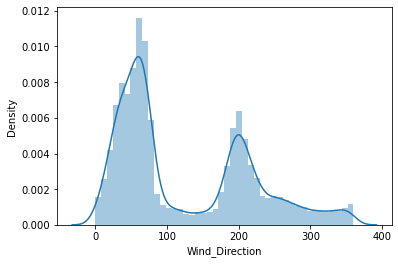

In [20]:
sns.distplot(data['Wind_Direction'])

<AxesSubplot:xlabel='Active_Power', ylabel='Count'>

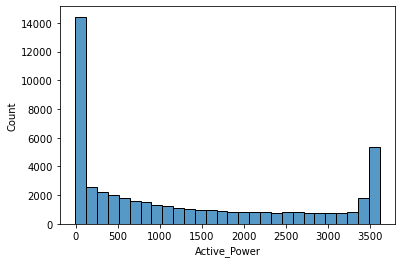

In [21]:
sns.histplot(data['Active_Power'])

<AxesSubplot:xlabel='Wind_Speed', ylabel='Count'>

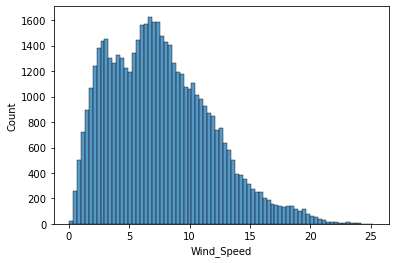

In [22]:
sns.histplot(data['Wind_Speed'])

<AxesSubplot:xlabel='Theoretical_Power', ylabel='Count'>

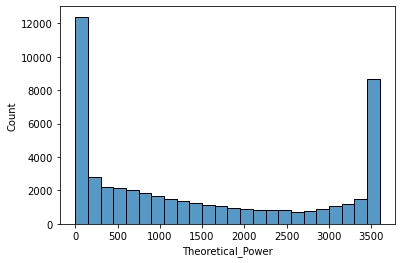

In [23]:
sns.histplot(data['Theoretical_Power'])

<AxesSubplot:xlabel='Wind_Direction', ylabel='Count'>

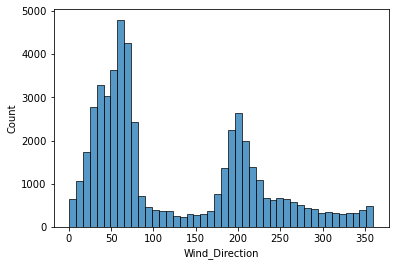

In [24]:
sns.histplot(data['Wind_Direction'])

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Active_Power'>

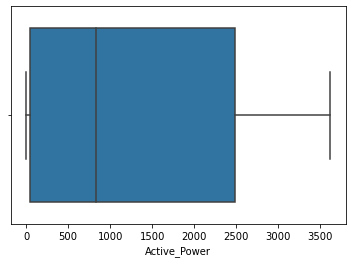

In [25]:
sns.boxplot(data['Active_Power'])

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Theoretical_Power'>

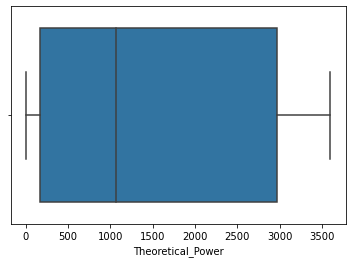

In [26]:
sns.boxplot(data['Theoretical_Power'])

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Wind_Direction'>

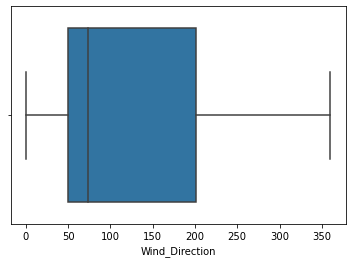

In [27]:
sns.boxplot(data['Wind_Direction'])

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Wind_Speed'>

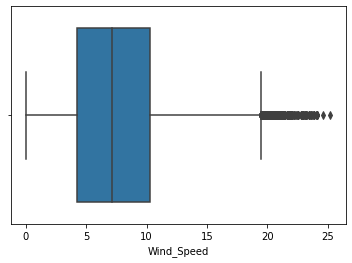

In [28]:
sns.boxplot(data['Wind_Speed'])

### Bi Variate Analysis

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Active_Power', ylabel='Theoretical_Power'>

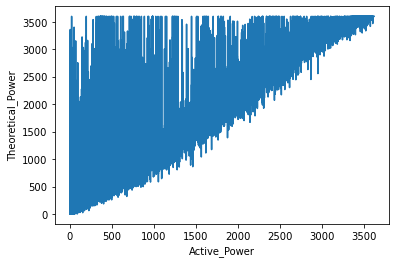

In [29]:
sns.lineplot(data['Active_Power'], data['Theoretical_Power'])

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Active_Power', ylabel='Theoretical_Power'>

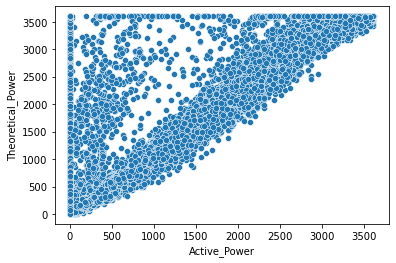

In [30]:
sns.scatterplot(data['Active_Power'], data['Theoretical_Power'])

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Theoretical_Power', ylabel='Wind_Direction'>

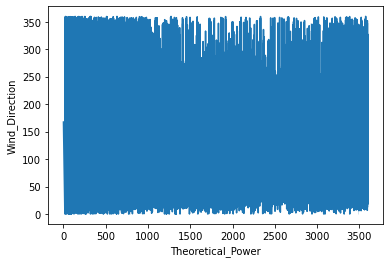

In [31]:
sns.lineplot(data['Theoretical_Power'], data['Wind_Direction'])

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Theoretical_Power', ylabel='Wind_Direction'>

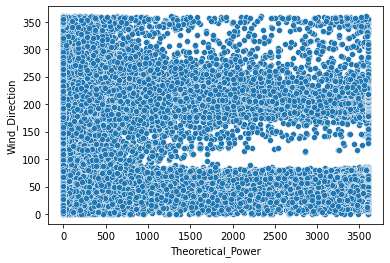

In [32]:
sns.scatterplot(data['Theoretical_Power'], data['Wind_Direction'])

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Theoretical_Power', ylabel='Wind_Speed'>

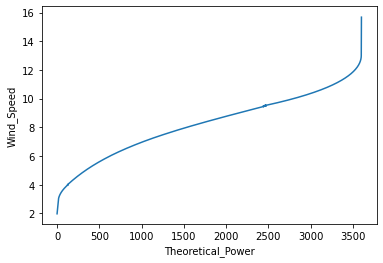

In [33]:
sns.lineplot(data['Theoretical_Power'], data['Wind_Speed'])

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Theoretical_Power', ylabel='Wind_Speed'>

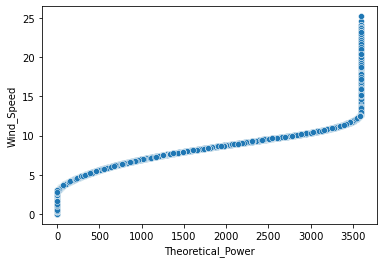

In [34]:
sns.scatterplot(data['Theoretical_Power'], data['Wind_Speed'])

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Active_Power', ylabel='Wind_Speed'>

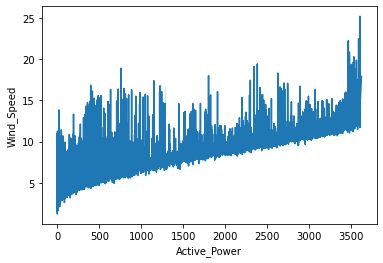

In [35]:
sns.lineplot(data['Active_Power'], data['Wind_Speed'])

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Active_Power', ylabel='Wind_Speed'>

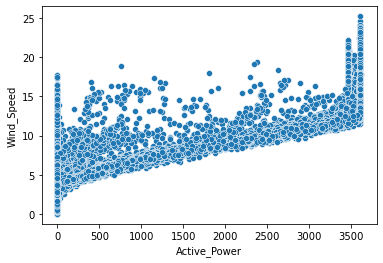

In [36]:
sns.scatterplot(data['Active_Power'], data['Wind_Speed'])

## Multi Variate Analysis

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Active_Power', ylabel='Theoretical_Power'>

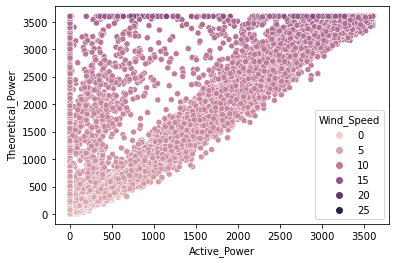

In [37]:
sns.scatterplot(data['Active_Power'], data['Theoretical_Power'], hue = data['Wind_Speed'])

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Active_Power', ylabel='Theoretical_Power'>

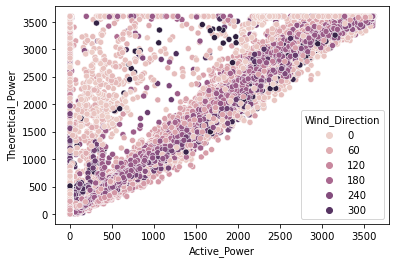

In [38]:
sns.scatterplot(data['Active_Power'], data['Theoretical_Power'], hue = data['Wind_Direction'])

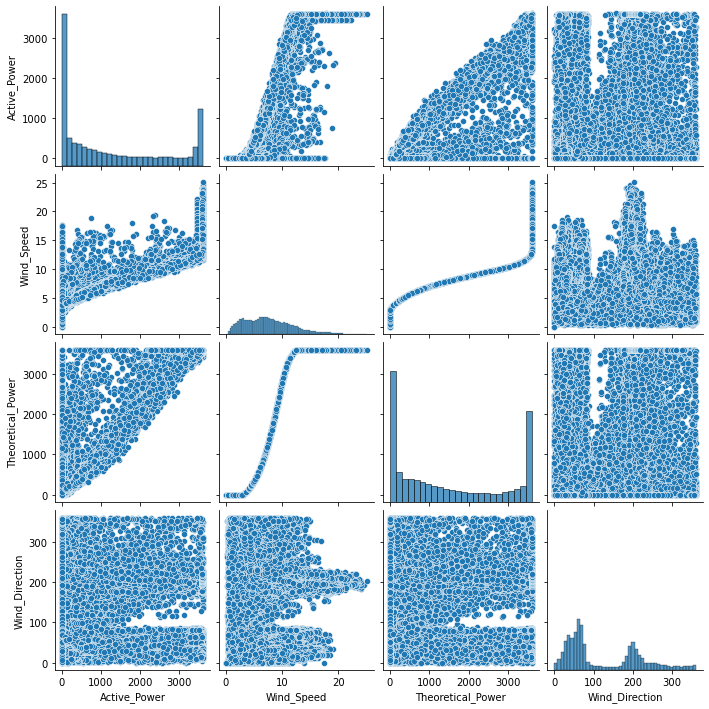

In [39]:
sns.pairplot(data)

In [40]:
data.corr()

,Active_Power,Wind_Speed,Theoretical_Power,Wind_Direction
Active_Power,1.000000,0.912774,0.949918,-0.062702
Wind_Speed,0.912774,1.000000,0.944209,-0.077188
Theoretical_Power,0.949918,0.944209,1.000000,-0.099076
Wind_Direction,-0.062702,-0.077188,-0.099076,1.000000


<AxesSubplot:>

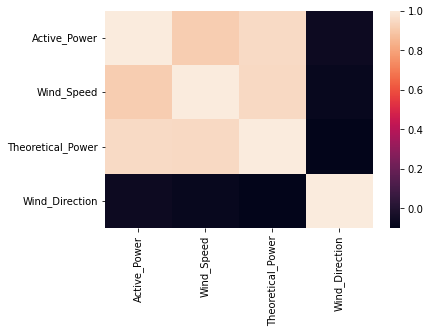

In [41]:
sns.heatmap(data.corr())

## Handling The Missing Values

In [42]:
#missing values

data.isna().sum()

Date                 0
Active_Power         0
Wind_Speed           0
Theoretical_Power    0
Wind_Direction       0
dtype: int64

In [43]:
data.isnull().any()

Date                 False
Active_Power         False
Wind_Speed           False
Theoretical_Power    False
Wind_Direction       False
dtype: bool

In [44]:
data.isnull().sum()

Date                 0
Active_Power         0
Wind_Speed           0
Theoretical_Power    0
Wind_Direction       0
dtype: int64

In [45]:
data.mode()

,Date,Active_Power,Wind_Speed,Theoretical_Power,Wind_Direction
0,01 01 2018 00:00,0.0,0.0,0.0,0.0
1,01 01 2018 00:10,NaN,NaN,NaN,NaN
2,01 01 2018 00:20,NaN,NaN,NaN,NaN
3,01 01 2018 00:30,NaN,NaN,NaN,NaN
4,01 01 2018 00:40,NaN,NaN,NaN,NaN
...,...,...,...,...,...
50525,31 12 2018 23:10,NaN,NaN,NaN,NaN
50526,31 12 2018 23:20,NaN,NaN,NaN,NaN
50527,31 12 2018 23:30,NaN,NaN,NaN,NaN
50528,31 12 2018 23:40,NaN,NaN,NaN,NaN


In [46]:
data['Active_Power'].unique()

array([ 380.04779053,  453.76919556,  306.37658691, ..., 2201.10693359,
       2515.6940918 , 2820.46606445])

In [47]:
data['Active_Power'].value_counts

<bound method IndexOpsMixin.value_counts of 0         380.047791
1         453.769196
2         306.376587
3         419.645905
4         380.650696
            ...     
50525    2963.980957
50526    1684.353027
50527    2201.106934
50528    2515.694092
50529    2820.466064
Name: Active_Power, Length: 50530, dtype: float64>

In [48]:
# replacing the null values if needed here there is no need of this
# data['Active_Power'] = data['Active_Power'].fillna(data['Active_Power'].median())

## Find and Replace Outliers

In [49]:
data.describe()

,Active_Power,Wind_Speed,Theoretical_Power,Wind_Direction
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Wind_Speed'>

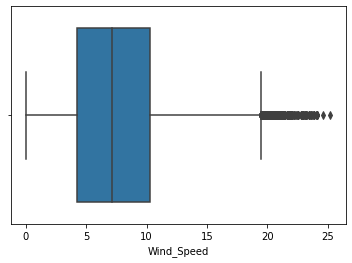

In [50]:
sns.boxplot(data['Wind_Speed'])

In [51]:
# position of the outlier
print(np.where(data['Wind_Speed']>20))

(array([ 2407,  2408,  2409,  2410,  2411,  2412,  2413,  2414,  2415,
        2416,  2433,  2436,  2437,  2438,  2439,  2444,  2747,  2748,
        2849,  2851,  2852,  2853,  2856,  2857,  2858,  2859,  2860,
        2861,  3947,  3949,  3950,  3951,  3952,  3953,  3954,  3955,
        3961,  3962,  3965,  3966,  3967,  3968,  3969,  3970,  3971,
        3972,  3973,  3976,  3977,  3978,  3979,  3980,  3982,  3983,
        3984,  3985,  3986,  3987,  3988,  3989,  3990,  3991,  3992,
        3993,  3994,  3995,  3996,  3997,  4003,  4005,  4006,  4007,
        4025,  4026,  4139,  4140,  4141,  4156,  4157,  4162,  4163,
        4179,  4180,  4206,  4207,  4208,  4210,  4217,  4218,  4219,
        4220,  4221,  4223,  4224,  4225,  4226,  4227,  4228,  4229,
        4230,  4231,  4232,  4233,  4234,  4235,  4236,  4237,  4238,
        4239,  4240,  4241,  4242,  4243,  4244,  4245,  4246,  4247,
        4248,  4249,  4250,  4251,  4252,  4253,  4254,  4255,  4256,
        4257,  4258

In [52]:
q = data.quantile([0.25,0.75])

In [53]:
q

,Active_Power,Wind_Speed,Theoretical_Power,Wind_Direction
0.25,50.677890,4.201395,161.328167,49.315437
0.75,2482.507568,10.300020,2964.972462,201.696720


In [54]:
iqr = q.iloc[0] - q.iloc[1]

In [55]:
iqr

Active_Power        -2431.829679
Wind_Speed             -6.098625
Theoretical_Power   -2803.644294
Wind_Direction       -152.381283
dtype: float64

In [56]:
u = q.iloc[0] + (1.5*iqr) # q3 + 1.5*iqr

In [57]:
u

Active_Power        -3597.066628
Wind_Speed             -4.946541
Theoretical_Power   -4044.138274
Wind_Direction       -179.256487
dtype: float64

In [58]:
l = q.iloc[1] - (1.5*iqr)

In [59]:
l

Active_Power         6130.252086
Wind_Speed             19.447957
Theoretical_Power    7170.438903
Wind_Direction        430.268644
dtype: float64

In [60]:
## handling outliers

data['Wind_Speed'] = np.where(data['Wind_Speed']>5,4,data['Wind_Speed'])

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Wind_Speed'>

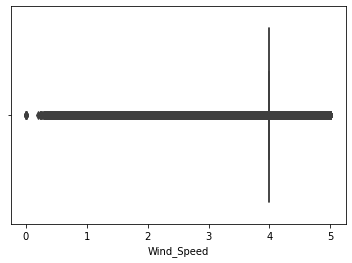

In [61]:
sns.boxplot(data['Wind_Speed'])

In [62]:
data['Active_Power'],data['Wind_Speed'].unique()

(0         380.047791
 1         453.769196
 2         306.376587
 3         419.645905
 4         380.650696
             ...     
 50525    2963.980957
 50526    1684.353027
 50527    2201.106934
 50528    2515.694092
 50529    2820.466064
 Name: Active_Power, Length: 50530, dtype: float64,
 array([4.        , 4.97719812, 4.96073198, ..., 4.79522991, 4.86061001,
        4.99478483]))

##  Check for Categorical columns and perform encoding.

In [63]:
# converting categorical values into numericalvalues - Encoding Here There is no categorical valus

In [64]:
data.head()

,Date,Active_Power,Wind_Speed,Theoretical_Power,Wind_Direction
0,01 01 2018 00:00,380.047791,4.0,416.328908,259.994904
1,01 01 2018 00:10,453.769196,4.0,519.917511,268.641113
2,01 01 2018 00:20,306.376587,4.0,390.900016,272.564789
3,01 01 2018 00:30,419.645905,4.0,516.127569,271.258087
4,01 01 2018 00:40,380.650696,4.0,491.702972,265.674286


In [65]:
#statisticak overview of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Active_Power,50530.0,1307.684332,1312.459242,-2.471405,50.677890,825.838074,2482.507568,3618.732910
Wind_Speed,50530.0,3.685969,0.808397,0.000000,4.000000,4.000000,4.000000,4.999811
Theoretical_Power,50530.0,1492.175463,1368.018238,0.000000,161.328167,1063.776283,2964.972462,3600.000000
Wind_Direction,50530.0,123.687559,93.443736,0.000000,49.315437,73.712978,201.696720,359.997589


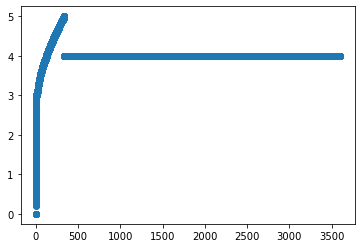

In [66]:
#scatterplot
plt.scatter(data['Theoretical_Power'],data['Wind_Speed'])

## Split the data into dependent and independent variables

In [67]:
#split the data

x=x = data[["Theoretical_Power", "Wind_Speed"]]
y=data["Active_Power"]

In [68]:
x=x = data[["Theoretical_Power", "Wind_Speed"]].values
y=data["Active_Power"].values

In [69]:
x

array([[ 416.32890782,    4.        ],
       [ 519.91751106,    4.        ],
       [ 390.90001581,    4.        ],
       ...,
       [1788.28475526,    4.        ],
       [2418.38250336,    4.        ],
       [2779.18409628,    4.        ]])

In [70]:
y

array([ 380.04779053,  453.76919556,  306.37658691, ..., 2201.10693359,
       2515.6940918 , 2820.46606445])

## Scale the independent variables

In [71]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

In [72]:
x_scaled

array([[-0.78643484,  0.38846545],
       [-0.71071243,  0.38846545],
       [-0.80502315,  0.38846545],
       ...,
       [ 0.21645342,  0.38846545],
       [ 0.6770496 ,  0.38846545],
       [ 0.94079255,  0.38846545]])

## Split the data into training and testing

In [73]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [74]:
x_train

array([[1.14585294e+02, 3.92796993e+00],
       [3.38589043e+03, 4.00000000e+00],
       [3.20880745e+03, 4.00000000e+00],
       ...,
       [3.60000000e+03, 4.00000000e+00],
       [2.30494205e+03, 4.00000000e+00],
       [0.00000000e+00, 1.25968695e+00]])

In [75]:
y_train

array([  74.87545776, 2908.67895508, 3307.58105469, ..., 3592.63208008,
       2056.78198242,    0.        ])

In [76]:
x_test

array([[1293.57695176,    4.        ],
       [   0.        ,    1.79004705],
       [  90.73904547,    3.78703499],
       ...,
       [1312.44613949,    4.        ],
       [ 763.05255751,    4.        ],
       [  36.05298889,    3.33913112]])

In [77]:
y_test

array([ 983.88287354,    0.        ,   54.07448959, ..., 1311.77404785,
        705.61932373,    0.        ])

## MODEL BUILDING

In [78]:
from sklearn.ensemble import RandomForestRegressor

RFR= RandomForestRegressor(n_estimators = 750, max_depth = 4, max_leaf_nodes = 500, random_state = 1)

RFR.fit(x_train,y_train) 

RandomForestRegressor(max_depth=4, max_leaf_nodes=500, n_estimators=750,
                      random_state=1)

### Predicting

In [79]:
#predcition on the test data
y_pred=RFR.predict(x_test)
y_pred

array([1047.54019638,    9.97986619,    9.97986619, ..., 1047.89861524,
        583.75295845,    9.97986619])

In [80]:
#predccition in the train data 
pred=RFR.predict(x_train)
pred

array([  40.59273026, 2883.71685307, 2604.72678796, ..., 3445.8208001 ,
       1836.72879126,    9.97986619])

### Evaluation of Metrics

In [81]:
#FInding accuracy

from sklearn.metrics import r2_score

acc=r2_score(y_test,y_pred)

acc

0.9141111730551297

In [82]:
# Deployment

In [83]:
!pip install -U ibm-watson-machine-learning

In [84]:
from ibm_watson_machine_learning import APIClient

In [85]:
wml_credentials = {
    "apikey":"S0ahhsqevpUY0Eu1YKv5Kyl38OMCy3haa5WCXw0am_wL",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [86]:
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ---------------------  ------------------------
ID                                    NAME                   CREATED
2e6bb5d6-f48b-4c2c-b5dc-ff3a250aa678  Wind_Power_Prediction  2022-11-06T13:45:38.000Z
888785e5-6a02-435e-b80d-e3cff3e63442  models                 2022-10-09T14:26:59.138Z
------------------------------------  ---------------------  ------------------------


In [87]:
space_id = "2e6bb5d6-f48b-4c2c-b5dc-ff3a250aa678"

In [88]:
wml_client.set.default_space(space_id)

'SUCCESS'

In [89]:
wml_client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [95]:
MODEL_NAME = 'Wind_Energy_Prediction'
DEPLOYMENT_NAME = 'Wind_Energy_deploy'
WIND_ENERGY_MODEL = RFR

In [96]:
# Set Python Version
software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

In [97]:
# Setup model meta
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0', 
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}

In [99]:
#Save model
model_details = wml_client.repository.store_model(
    model=WIND_ENERGY_MODEL, 
    meta_props=model_props, 
    training_data=x_train, 
    training_target=y_train
)

In [100]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'l1',
  'schemas': {'input': [{'fields': [{'name': 'f0', 'type': 'float'},
      {'name': 'f1', 'type': 'float'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-11T14:16:40.875Z',
  'id': 'b5999bed-2e59-4187-8768-8de65baee295',
  'modified_at': '2022-11-11T14:16:44.688Z',
  'name': 'Wind_Energy_Prediction',
  'owner': 'IBMid-667000ASTM',
  'resource_key': 'f88f4dec-82d2-4312-92ef-eb7eb8969255',
  'space_id': '2e6bb5d6-f48b-4c2c-b5dc-ff3a250aa678'},
 'system': {'warnings': []}}